In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv('C:/Users/86150/Desktop/Uchicago/ADSP 31012 Data Engineering Platforms for Analytics/project/Crimes.csv')

In [28]:
df.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JH117298,1/16/2024 1:00,038XX W DIVERSEY AVE,0810,THEFT,OVER $500,STREET,N,N,2524,35,06,1150337.0,1918345.0,41.931844,-87.722951,"(41.931843966, -87.722950868)"
1,JG561057,12/31/2023 16:30,004XX N WABASH AVE,0460,BATTERY,SIMPLE,STREET,N,N,1834,42,08B,1176592.0,1902931.0,41.888994,-87.626935,"(41.888993854, -87.626934833)"
2,JG512939,11/21/2023 14:28,056XX S ELIZABETH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,RESIDENCE - YARD (FRONT / BACK),N,N,713,16,15,1168951.0,1867382.0,41.791613,-87.656025,"(41.791613294, -87.656024853)"
3,JG496628,11/8/2023 15:27,059XX N GLENWOOD AVE,0460,BATTERY,SIMPLE,SCHOOL - PUBLIC BUILDING,Y,N,2013,48,08B,1165910.0,1939379.0,41.989244,-87.665120,"(41.989243623, -87.665119726)"
4,JG512358,11/21/2023 2:12,049XX W SCHUBERT AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,ALLEY,N,N,2521,31,14,1143030.0,1917505.0,41.929679,-87.749824,"(41.929678531, -87.749824286)"


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258062 entries, 0 to 258061
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CASE#                  258062 non-null  object 
 1   DATE  OF OCCURRENCE    258062 non-null  object 
 2   BLOCK                  258062 non-null  object 
 3    IUCR                  258062 non-null  object 
 4   PRIMARY DESCRIPTION    258062 non-null  object 
 5   SECONDARY DESCRIPTION  258062 non-null  object 
 6   LOCATION DESCRIPTION   257004 non-null  object 
 7   ARREST                 258062 non-null  object 
 8   DOMESTIC               258062 non-null  object 
 9   BEAT                   258062 non-null  int64  
 10  WARD                   258062 non-null  int64  
 11  FBI CD                 258062 non-null  object 
 12  X COORDINATE           257970 non-null  float64
 13  Y COORDINATE           257970 non-null  float64
 14  LATITUDE               257970 non-nu

In [30]:
df.describe()

,BEAT,WARD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,258062.000000,258062.000000,2.579700e+05,2.579700e+05,257970.000000,257970.000000
mean,1157.826290,23.164643,1.165278e+06,1.887705e+06,41.847445,-87.668957
std,710.645078,13.947239,1.618130e+04,3.164072e+04,0.087007,0.058917
min,111.000000,1.000000,1.091242e+06,1.813897e+06,41.644590,-87.939733
25%,533.000000,10.000000,1.154004e+06,1.860315e+06,41.772188,-87.709875
50%,1034.000000,23.000000,1.167106e+06,1.894302e+06,41.865663,-87.662121
75%,1732.000000,34.000000,1.176651e+06,1.910508e+06,41.910120,-87.627297
max,2535.000000,50.000000,1.205117e+06,1.951493e+06,42.022548,-87.524532


CHECKING FOR DUPLICATES

In [31]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Optionally, display the duplicate rows
if num_duplicates > 0:
    duplicate_rows = df[duplicates]
    print("Duplicate rows:")
    print(duplicate_rows)


Number of duplicate rows: 9
Duplicate rows:
           CASE# DATE  OF OCCURRENCE                      BLOCK  IUCR  \
17377   JH185103     3/12/2024 15:45           069XX S STATE ST  0110   
37541   JH277783     5/24/2024 23:43            047XX N TROY ST  0110   
109063  JG538547    12/12/2023 18:16            035XX W 61ST PL  0110   
109279  JH333940       7/5/2024 7:12            036XX E 87TH ST  0110   
122373  JH284448      5/30/2024 2:16     028XX S SACRAMENTO AVE  0110   
161874  JH185734      3/13/2024 0:40           002XX W 109TH PL  0110   
169467  JG510509    11/19/2023 15:00  089XX S COTTAGE GROVE AVE  0110   
191196  JH317789      6/23/2024 8:44         123XX S HALSTED ST  0110   
250638  JH459847     10/7/2024 22:45        078XX S WESTERN AVE  0110   

       PRIMARY DESCRIPTION SECONDARY DESCRIPTION LOCATION DESCRIPTION ARREST  \
17377             HOMICIDE   FIRST DEGREE MURDER               STREET      N   
37541             HOMICIDE   FIRST DEGREE MURDER                A

In [32]:
# Check for duplicate values in the 'CASE#' column
duplicates_case = df['CASE#'].duplicated()

# Count the number of duplicate 'CASE#' values
num_case_duplicates = duplicates_case.sum()
print(f"Number of duplicate CASE#: {num_case_duplicates}")

# Optionally, display the rows with duplicate 'CASE#'
if num_case_duplicates > 0:
    duplicate_rows_case = df[df['CASE#'].duplicated(keep=False)]
    print("Rows with duplicate CASE#:")
    print(duplicate_rows_case)


Number of duplicate CASE#: 31
Rows with duplicate CASE#:
           CASE# DATE  OF OCCURRENCE                      BLOCK  IUCR  \
6551    JH165644     2/25/2024 20:16      080XX S VINCENNES AVE  0110   
7135    JH128963     1/26/2024 12:59         000XX N WABASH AVE  0110   
14214   JH185103     3/12/2024 15:45           069XX S STATE ST  0110   
17377   JH185103     3/12/2024 15:45           069XX S STATE ST  0110   
31562   JH332664      7/4/2024 13:36       071XX S WOODLAWN AVE  0110   
37129   JH277783     5/24/2024 23:43            047XX N TROY ST  0110   
37541   JH277783     5/24/2024 23:43            047XX N TROY ST  0110   
46564   JG499426    11/10/2023 20:52         083XX S PULASKI RD  0110   
51231   JH290818      6/3/2024 18:10           096XX S GREEN ST  0110   
51282   JG545814    12/18/2023 17:10      065XX S CLAREMONT AVE  0110   
65812   JH165644     2/25/2024 19:59      080XX S VINCENNES AVE  0110   
68575   JH232120      4/20/2024 6:46            025XX E 83RD ST  01

CHECKING FOR MISSING VALUES

In [33]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Optionally, display rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing)


Missing values in each column:
LOCATION DESCRIPTION    1058
X COORDINATE              92
Y COORDINATE              92
LATITUDE                  92
LONGITUDE                 92
LOCATION                  92
dtype: int64

Rows with missing values:
           CASE# DATE  OF OCCURRENCE                     BLOCK  IUCR  \
28      JG544413    12/16/2023 16:15  047XX S DAN RYAN XPRS IB  0910   
646     JH132435     12/1/2023 10:40      001XX W JACKSON BLVD  1154   
711     JH116207     1/15/2024 12:05      026XX W ARMITAGE AVE  1153   
887     JH160259      1/5/2024 10:10          023XX W LUNT AVE  1154   
972     JH177712     2/29/2024 12:15     009XX W DIVERSEY PKWY  1153   
...          ...                 ...                       ...   ...   
257984  JH480388    10/16/2024 15:00           004XX W OHIO ST  0910   
257989  JH480751      10/8/2024 8:00       043XX N KEDVALE AVE  0820   
257999  JH481050      7/26/2024 7:10      023XX S LAWNDALE AVE  0460   
258002  JH480849    10/11/2024 22:0

SHOW ROWS MISSING LOCATION DESCRIPTION

In [34]:
# Filter rows where 'LOCATION DESCRIPTION' is missing
missing_location_description = df[df['LOCATION DESCRIPTION'].isnull()]

# Display the rows
print("Rows with missing LOCATION DESCRIPTION:")
print(missing_location_description)


Rows with missing LOCATION DESCRIPTION:
           CASE# DATE  OF OCCURRENCE                  BLOCK  IUCR  \
646     JH132435     12/1/2023 10:40   001XX W JACKSON BLVD  1154   
711     JH116207     1/15/2024 12:05   026XX W ARMITAGE AVE  1153   
887     JH160259      1/5/2024 10:10       023XX W LUNT AVE  1154   
972     JH177712     2/29/2024 12:15  009XX W DIVERSEY PKWY  1153   
1205    JH222043       4/9/2024 0:33  049XX S VINCENNES AVE  1130   
...          ...                 ...                    ...   ...   
256733  JH471601    10/16/2024 14:15    008XX N FRANKLIN ST  1153   
257298  JH472014    10/17/2024 12:25       009XX S CLARK ST  1153   
257322  JH471600     10/17/2024 9:55   012XX W JACKSON BLVD  1153   
257683  JH473168    10/17/2024 22:00  052XX N Newcastle Ave  1154   
257815  JH479704      7/10/2024 9:45        009XX W 54TH PL  1153   

       PRIMARY DESCRIPTION                    SECONDARY DESCRIPTION  \
646     DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AN

SHOW ROWS WITH MISSING X/Y Coordinate & Location

In [35]:
# Filter rows where 'LATITUDE' is missing
missing_latitude = df[df['LATITUDE'].isnull()]

# Display the rows with missing 'LATITUDE'
print(missing_latitude)


           CASE# DATE  OF OCCURRENCE                     BLOCK  IUCR  \
28      JG544413    12/16/2023 16:15  047XX S DAN RYAN XPRS IB  0910   
1122    JH134156     1/28/2024 21:00       069XX S PARNELL AVE  1752   
1212    JH231872     4/19/2024 18:50       001XX E CHICAGO AVE  0860   
1240    JH237451     4/24/2024 13:30       013XX N ASHLAND AVE  0860   
1492    JH295685      5/27/2024 8:42          001XX N STATE ST  1310   
...          ...                 ...                       ...   ...   
257984  JH480388    10/16/2024 15:00           004XX W OHIO ST  0910   
257989  JH480751      10/8/2024 8:00       043XX N KEDVALE AVE  0820   
257999  JH481050      7/26/2024 7:10      023XX S LAWNDALE AVE  0460   
258002  JH480849    10/11/2024 22:00   016XX S BLUE ISLAND AVE  0870   
258015  JH480753     10/2/2024 18:00       054XX S DEARBORN ST  0760   

               PRIMARY DESCRIPTION  \
28             MOTOR VEHICLE THEFT   
1122    OFFENSE INVOLVING CHILDREN   
1212                 

Correlation Between Categorical Variables

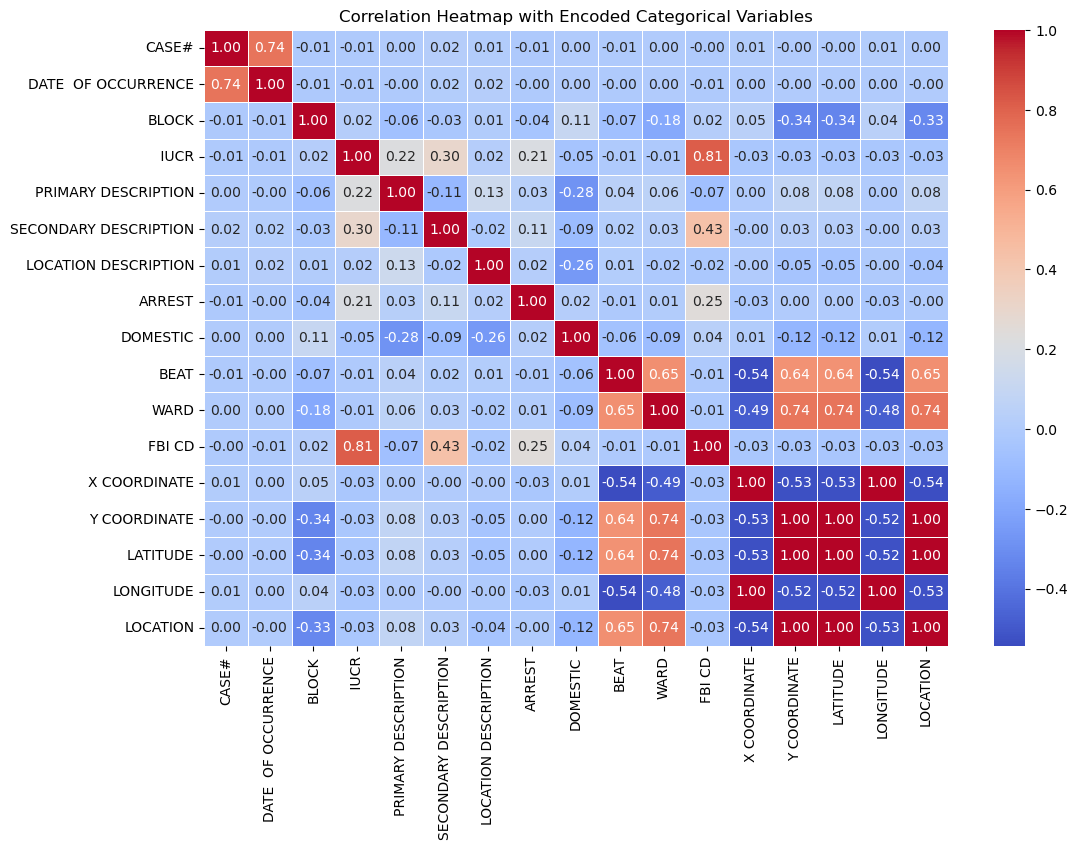

In [36]:
# Make a copy of the DataFrame to encode categorical columns
df_encoded = df.copy()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with Encoded Categorical Variables')
plt.show()

Common Crime Types

Top 10 Most Common Crime Types:
PRIMARY DESCRIPTION
THEFT                  59976
BATTERY                45621
CRIMINAL DAMAGE        28813
ASSAULT                23430
MOTOR VEHICLE THEFT    23211
OTHER OFFENSE          16684
DECEPTIVE PRACTICE     15049
ROBBERY                 9849
WEAPONS VIOLATION       8159
BURGLARY                8043
Name: count, dtype: int64


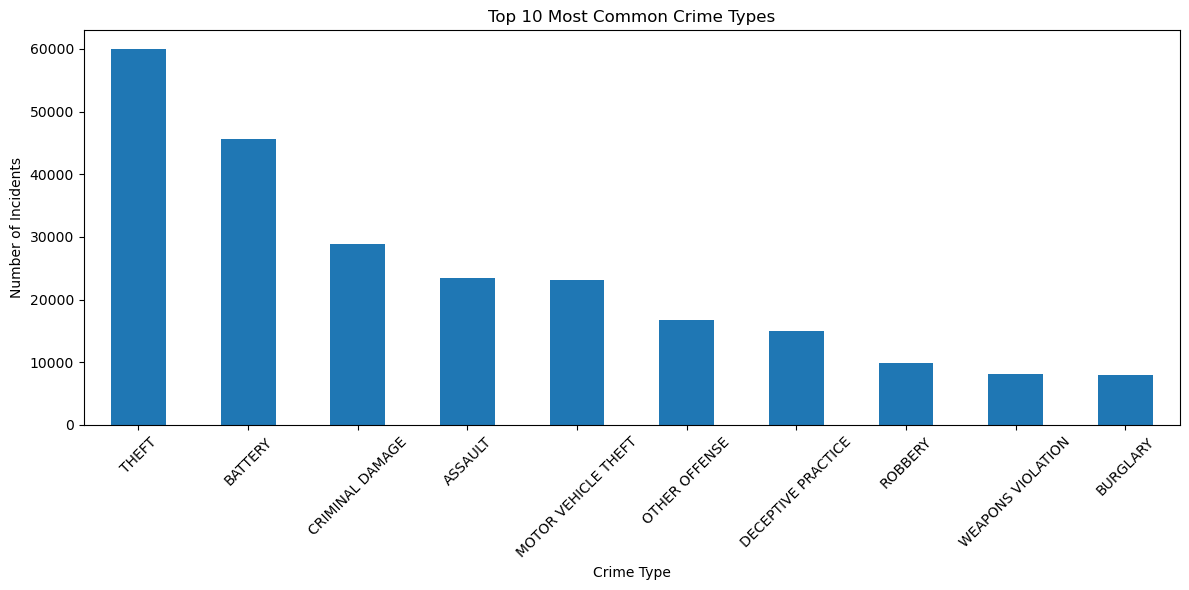

In [37]:
# Group by 'PRIMARY DESCRIPTION' to count occurrences of each crime type
crime_counts = df['PRIMARY DESCRIPTION'].value_counts()

# Display the top 10 most common crime types
top_crimes = crime_counts.head(10)
print("Top 10 Most Common Crime Types:")
print(top_crimes)

# Plot the top 10 most common crime types
plt.figure(figsize=(12, 6))
top_crimes.plot(kind='bar')
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()